# Notebook to test realisation of richardson_lucy_matlab
## A LR method in matlab style
Install library before use like this:

```
git clone git@github.com:progiv/scikit-image.git
cd scikit-image
pip3 install --user -e .
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration, io

In [2]:
# Prepare data
astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
#astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

In [3]:
def show_results(original, noisy, result):
    # Show results
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
    plt.gray()

    for a in (ax[0], ax[1], ax[2]):
           a.axis('off')

    ax[0].imshow(original)
    ax[0].set_title('Original Data')

    ax[1].imshow(noisy)
    ax[1].set_title('Noisy data')

    ax[2].imshow(result, vmin=noisy.min(), vmax=noisy.max())
    ax[2].set_title('Restoration using\nRichardson-Lucy')


    fig.subplots_adjust(wspace=0.02, hspace=0.2,
                        top=0.9, bottom=0.05, left=0, right=1)
    plt.show()

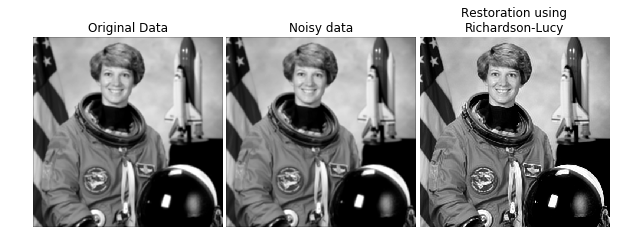

In [4]:
# Restore Image using Richardson-Lucy algorithm my:
deconvolved_RL_my = restoration.richardson_lucy_matlab(astro_noisy, psf, iterations=20, eps=1e-5)
show_results(astro, astro_noisy, deconvolved_RL_my)

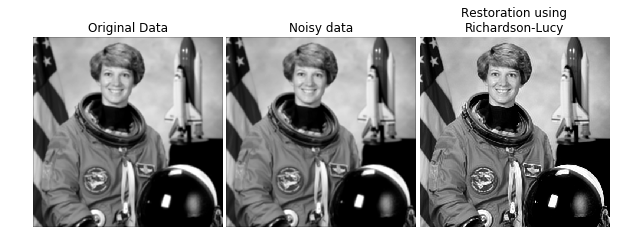

In [5]:
deconvolved_RL_my[deconvolved_RL_my>10] = 1
show_results(astro, astro_noisy, deconvolved_RL_my)

/home/progiv/study/diploma/scikit-image/skimage/restoration/deconvolution.py:389: RuntimeWarning: invalid value encountered in true_divide
  relative_blur = image / convolve_method(im_deconv, psf, 'same')
/home/progiv/study/diploma/scikit-image/skimage/restoration/deconvolution.py:393: RuntimeWarning: invalid value encountered in greater
  im_deconv[im_deconv > 1] = 1
/home/progiv/study/diploma/scikit-image/skimage/restoration/deconvolution.py:394: RuntimeWarning: invalid value encountered in less
  im_deconv[im_deconv < -1] = -1


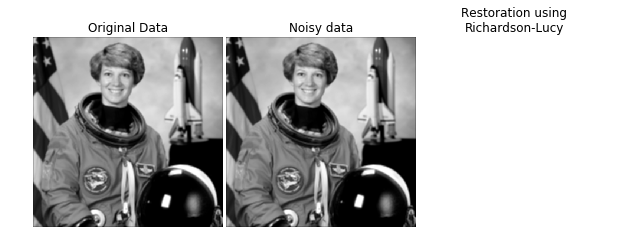

In [6]:
# Restore Image using Richardson-Lucy algorithm, how it must be:
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=10)
show_results(astro, astro_noisy, deconvolved_RL)